In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import formatting.VMC_colors as vc
plt.style.use(['formatting/vmc_colors.mplstyle','formatting/publication.mplstyle'])
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter


This file produces publication ready figures found in Figure 1.

In [2]:
ag = pd.read_excel("../multicompound_data/grouped_data.xlsx")
ag.columns

Index(['CAS', 'Name', 'Production', 'frac_of_prod', 'patent_count',
       'temp_reports', 'temp_c_avg', 'temp_c_median', 'pressure_reports',
       'pressure_bar_avg', 'pressure_bar_median', 'enthalpy_average',
       'entropy_average', 'MolecularWeight', 'BoilingPoint', 'MeltingPoint',
       'A', 'B', 'C', 'Hvap_kJmol'],
      dtype='object')

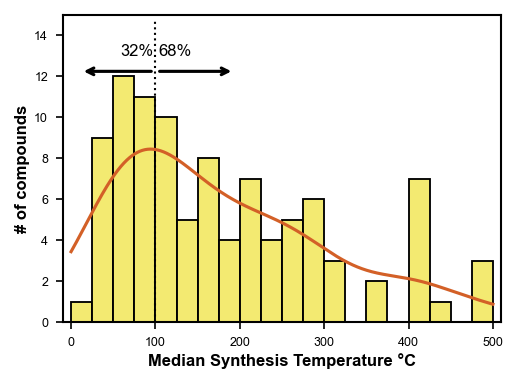

In [3]:
cutoff = 100 # location of line + integral bounds
fig, ax = plt.subplots(figsize=(3.5, 2.6))
plt.vlines(100, 0,0.006*98*25, color='black', linestyle=":", lw = 1)

# Making the histogram
sns.histplot(data = ag, x = 'temp_c_median', bins = np.linspace(0, 500, 21), color = "#F0E442", stat='count')

# Calculating + Plotting the KDE
kds = gaussian_kde(ag["temp_c_median"], bw_method = "silverman")
xs = np.linspace(0, 500, 1000)
plt.plot(xs, kds.evaluate(xs)*98*25, color = "#D36027")

# Integrating the KDE
low_temp = kds.integrate_box_1d(-200, cutoff)
high_temp = kds.integrate_box_1d(cutoff,1000)

# Adding Arrows+Percentage Labels
plt.annotate(
    '',                # Text label
    xy=(10, 0.005*98*25),               # Point (x, y) to annotate (point of arrow)
    xytext=(cutoff, 0.005*98*25),            # Position of the text, keeping the same y-coordinate for horizontal arrow
    arrowprops=dict(facecolor='black', arrowstyle="->", lw=1.5)  # Arrow style ensures horizontal shape
)
plt.text(cutoff-2, 0.0053*98*25, f"{low_temp*100:.0f}%",  ha='right')

plt.annotate(
    '',                # Text label
    xy=(100+95, 0.005*98*25),               # Point (x, y) to annotate (point of arrow)
    xytext=(cutoff, 0.005*98*25),            # Position of the text, keeping the same y-coordinate for horizontal arrow
    arrowprops=dict(facecolor='black', arrowstyle="->", lw=1.5)  # Arrow style ensures horizontal shape
)
plt.text(cutoff+3, 0.0053*98*25, f"{high_temp*100:.0f}%")

# Titles + Formatting
plt.xlim(-10, 510)
plt.ylim(0, 15)
#plt.title('Median Reported Synthesis Temperature for \n 98 Industrially Relevant Small Organics')
plt.xlabel("Median Synthesis Temperature °C")
plt.ylabel("# of compounds")
plt.tight_layout()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.savefig(r"..\final figures\histogram_KDE_percentagelabels.svg", bbox_inches='tight', format='svg')



0.5316037710556083


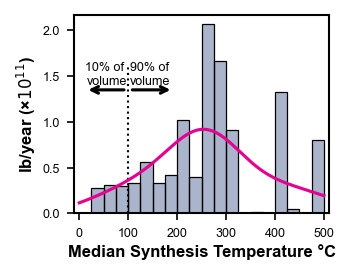

In [5]:
fig, ax = plt.subplots(figsize=(2.3667, 1.8758))
cutoff = 100 # location of line + integral bounds
plt.vlines(100, 0,0.006*np.sum(ag['Production'])*25, color='black', linestyle=":", lw = 1)

# Making the histogram
sns.histplot(data = ag, x = 'temp_c_median', bins = list(np.linspace(0, 500, 21)), weights = 'Production', alpha = 0.4)

# Calculating + Plotting the KDE
kds = gaussian_kde(ag["temp_c_median"], bw_method = "silverman", weights = ag['Production'])
xs = np.linspace(0, 500, 1000)
ax.plot(xs, kds.evaluate(xs)*np.sum(ag['Production'])*25, color = vc.get_color('magenta'))

# Integrating the KDE
low_temp = kds.integrate_box_1d(-200, cutoff)
high_temp = kds.integrate_box_1d(cutoff,1000)
print(kds.integrate_box_1d(100, 300))
# Adding Arrows+Percentage Labels
plt.annotate(
    '',                # Text label
    xy=(10, 0.005*np.sum(ag['Production'])*25),               # Point (x, y) to annotate (point of arrow)
    xytext=(cutoff, 0.005*np.sum(ag['Production'])*25),            # Position of the text, keeping the same y-coordinate for horizontal arrow
    arrowprops=dict(facecolor='black', arrowstyle="->", lw=1.5)  # Arrow style ensures horizontal shape
)
plt.text(cutoff-2, 0.0052*np.sum(ag['Production'])*25, f"{low_temp*100:.0f}% of \nvolume",  ha='right',  size = 6)

plt.annotate(
    '',                # Text label
    xy=(100+95, 0.005*np.sum(ag['Production'])*25),               # Point (x, y) to annotate (point of arrow)
    xytext=(cutoff, 0.005*np.sum(ag['Production'])*25),            # Position of the text, keeping the same y-coordinate for horizontal arrow
    arrowprops=dict(facecolor='black', arrowstyle="->", lw=1.5)  # Arrow style ensures horizontal shape
)
plt.text(cutoff+3, 0.0052*np.sum(ag['Production'])*25, f"{high_temp*100:.0f}% of \nvolume", size = 6)

# Titles + Formatting
plt.xlim(-10, 510)

#plt.title('Median Reported Synthesis Temperature for \n 98 Industrially Relevant Small Organics\nweighted by production volume (lb/year)')
plt.xlabel("Median Synthesis Temperature °C")
ax.set_ylabel("lb/year (×$10^{11}$)")

def billions(x, pos):
    return f'{x * 1e-11:.1f}'

ax.yaxis.set_major_formatter(FuncFormatter(billions))
plt.tight_layout()
plt.savefig(r"..\final figures\histogram_KDE_productionweighted_percentagelabels.svg")

Bandwidth: 0.5


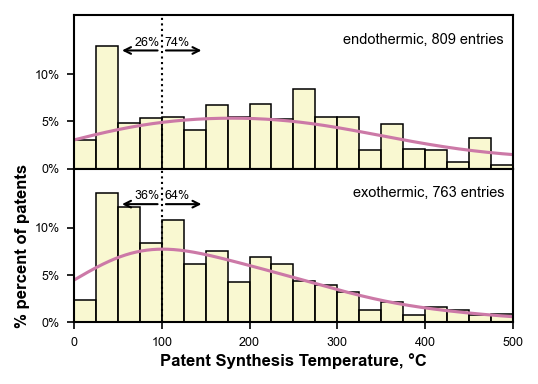

In [13]:
low = 0
high = 1000
df = pd.read_excel('../multicompound_data/combined_patent_entries.xlsx')
df['enthalpy_rxn_kJmol']  = df['enthalpy_rxn']/1000
df['gibbs_RT_kJmol'] = (df['enthalpy_rxn'] - 298* df['entropy_rxn'])/1000
df['gibbs_condition_kJmol'] = (df['enthalpy_rxn'] - (df['temperatures_c']+273.15)* df['entropy_rxn'])/1000

endothermic = df[(df["enthalpy_rxn_kJmol"]>low) & (df['enthalpy_rxn_kJmol']<high)]
exothermic = df[(df["enthalpy_rxn_kJmol"]<-low) & (df['enthalpy_rxn_kJmol']>-high)]

#fig, ax = plt.subplots(2,1, sharex=True)

fig = plt.figure(figsize=(3.5, 2.6))
gs = fig.add_gridspec(2, hspace=0)
ax = gs.subplots(sharex=True, sharey=True)

bw = 25

ymax = 0.0065*bw*100

bins = np.linspace(0, 600, int(600/bw+1))

sns.histplot(data = endothermic, x = 'temperatures_c', label = 'endothermic (100 to 300)', color = "#F0EE8D", stat='percent', bins = bins, ax = ax[0], alpha = 0.4)
sns.histplot(data = exothermic, x = 'temperatures_c', label = 'exothermic (-100 to -300)', color = "#F0EE8D", stat='percent', bins = bins, ax = ax[1], alpha = 0.4)


#sns.kdeplot(data = endothermic, x = 'temperatures_c', label = 'endothermic', color = 'black', ax = ax[0], bw_adjust=2)
#sns.kdeplot(data = exothermic, x = 'temperatures_c', label = 'exothermic', color = 'black', ax = ax[1], bw_adjust=2)

plt.xlim(0, 600)

cutoff = 100 # location of line + integral bounds
ax[0].vlines(100, 0, ymax, color='black', linestyle=":", lw = 1)
ax[1].vlines(100, 0, ymax, color='black', linestyle=":", lw = 1)


# Calculating + Plotting the KDE
kds = gaussian_kde(endothermic['temperatures_c'], bw_method = 0.5)
xs = np.linspace(0, 600, 1000)
ax[0].plot(xs, kds.evaluate(xs)*bw*100, color = "#CC79A7")



# Integrating the KDE
low_temp = kds.integrate_box_1d(-200, cutoff)
high_temp = kds.integrate_box_1d(cutoff,1000)

# Adding Arrows+Percentage Labels
ax[0].annotate(
    '',                # Text label
    xy=(50, 12.5),               # Point (x, y) to annotate (point of arrow)
    xytext=(cutoff, 12.5),            # Position of the text, keeping the same y-coordinate for horizontal arrow
    arrowprops=dict(facecolor='black', arrowstyle="->", lw=1)  # Arrow style ensures horizontal shape
)
ax[0].text(cutoff-2, 13, f"{low_temp*100:.0f}%",  ha='right', size = 6)

ax[0].annotate(
    '',                # Text label
    xy=(150,12.5),               # Point (x, y) to annotate (point of arrow)
    xytext=(cutoff, 12.5),            # Position of the text, keeping the same y-coordinate for horizontal arrow
    arrowprops=dict(facecolor='black', arrowstyle="->", lw=1)  # Arrow style ensures horizontal shape
)
ax[0].text(cutoff+3, 13, f"{high_temp*100:.0f}%", size = 6)

kds = gaussian_kde(exothermic['temperatures_c'], bw_method = 0.5)
xs = np.linspace(0, 600, 1000)
ax[1].plot(xs, kds.evaluate(xs)*bw*100, color = "#CC79A7")

bandwidth = kds.factor * endothermic['temperatures_c'].std(ddof=1)
print("Bandwidth:", kds.factor)

# Integrating the KDE
low_temp = kds.integrate_box_1d(-200, cutoff)
high_temp = kds.integrate_box_1d(cutoff,1000)

# Adding Arrows+Percentage Labels
ax[1].annotate(
    '',                # Text label
    xy=(50, 12.5),               # Point (x, y) to annotate (point of arrow)
    xytext=(cutoff, 12.5),            # Position of the text, keeping the same y-coordinate for horizontal arrow
    arrowprops=dict(facecolor='black', arrowstyle="->", lw=1)  # Arrow style ensures horizontal shape
)
ax[1].text(cutoff-2, 13, f"{low_temp*100:.0f}%",  ha='right', size = 6)

ax[1].annotate(
    '',                # Text label
    xy=(150, 12.5),               # Point (x, y) to annotate (point of arrow)
    xytext=(cutoff, 12.5),            # Position of the text, keeping the same y-coordinate for horizontal arrow
    arrowprops=dict(facecolor='black', arrowstyle="->", lw=1)  # Arrow style ensures horizontal shape
)
ax[1].text(cutoff+3, 13, f"{high_temp*100:.0f}%", size = 6)


ax[1].set_ylim(0, ymax)
ax[0].set_ylim(0, ymax)
#ax[0].invert_yaxis()
percent_formatter = FuncFormatter(lambda y, _: f'{int(y)}%')


for axs in ax:
    axs.set_ylabel('')  # remove y-axis label
    axs.set_yticks([0, 5, 10])  # only show 5, 10, 15
    axs.yaxis.set_major_formatter(percent_formatter)

ax[1].text(490, ymax - 3, "exothermic, " + str(len(exothermic)) + " entries", ha = 'right', fontsize = 7)
ax[0].text(490, ymax - 3, "endothermic, " + str(len(endothermic)) + " entries", ha = 'right', fontsize = 7)

#plt.suptitle("Temperature Bias Between Endo-Exothermic Reactions")
plt.xlabel("Patent Synthesis Temperature, °C")

plt.xlim(0, 500)
fig.tight_layout()
plt.ylabel("% percent of patents")

plt.savefig(r"..\final figures\histogram_KDE_splithermicity.svg")

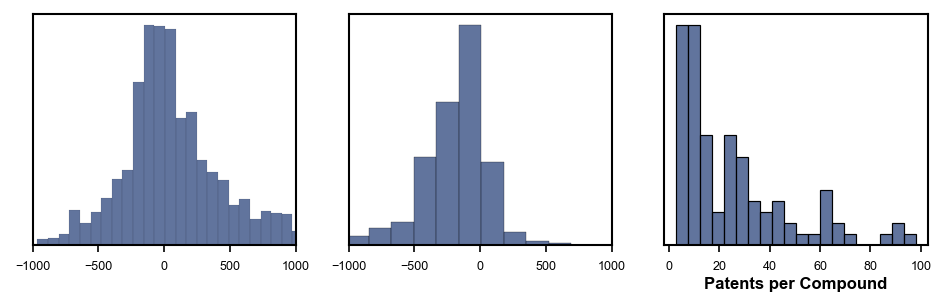

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(7.7, 2))
sns.histplot(data = df, x = 'enthalpy_rxn_kJmol', ax=ax[0], bins = 300)
ax[0].set_xlim(-1000, 1000)
ax[0].set_ylabel("")
#ax[0].set_xlabel(r"$\Delta H_{rxn}$, $kJ/mol$")
ax[0].set_xlabel("")

ax[0].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)



sns.histplot(data = df, x = 'entropy_rxn', ax=ax[1])
ax[1].set_xlim(-1000, 1000)
#ax[1].set_xlabel(r"$\Delta S_{rxn}$, $J/mol \cdot K$")
ax[1].set_xlabel("")
ax[1].set_ylabel("")

ax[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)


sns.histplot(data = ag, x = 'patent_count', ax=ax[2], bins = 20)

ax[2].set_xlabel("Patents per Compound")
ax[2].set_ylabel("")


ax[2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.savefig(r"..\final figures\enthalpyentropypatents.svg")
